<a href="https://colab.research.google.com/github/AecioLima/Scripts/blob/master/ML_A%C3%A7%C3%B5es_Google_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#Importar as bibliotecas principais
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
import keras

dataset_train = pd.read_csv('/Google_Stock_Price_Train.csv') 
training_set = dataset_train.iloc[:, 1:2].values

#aqui precisa analisar o preprocessing com sklearn 

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []

#substituir esse FOR posteriormente

for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#Teste com Keras 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

dataset_test = pd.read_csv('/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Dados Reais de Ações do Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Dados Previstos de Ações do Google')
plt.title('Previsão de Preços de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preços de Ações do Google')
plt.legend()
plt.show()


Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0474
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0062
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0057
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0050
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

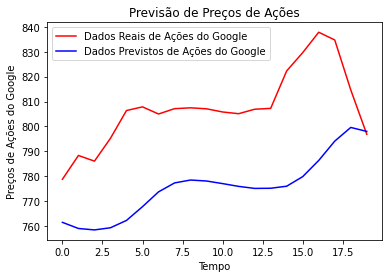

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Dados Reais de Ações do Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Dados Previstos de Ações do Google')
plt.title('Previsão de Preços de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preços de Ações do Google')
plt.legend()
plt.show()